In [13]:
#pip install seaborn --upgrade

  Found existing installation: seaborn 0.9.0
    Uninstalling seaborn-0.9.0:
      Successfully uninstalled seaborn-0.9.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn import metrics

# Load dataset

In [142]:
data = pd.read_csv('C:/Users/yangz/Desktop/job and interview/Quicken Loans/DSA Data Set.csv')

In [143]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no


In [454]:
# add 2 columns by Excel: 'row_number' - reflect time sequence, 'year' - reflect last contact year
df = pd.read_csv('C:/Users/yangz/Desktop/job and interview/Quicken Loans/DSA Data Set_new.csv')

In [455]:
df.head()

,row_number,age,job,marital,education,default,housing,loan,contact,month,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y,year
0,1,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no,2008
1,2,57,services,married,high.school,unknown,no,no,telephone,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no,2008
2,3,37,services,married,high.school,no,yes,no,telephone,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no,2008
3,4,40,admin.,married,basic.6y,no,no,no,telephone,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no,2008
4,5,56,services,married,high.school,no,no,yes,telephone,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no,2008


# EDA

### EDA - data structure

In [ ]:
df.describe()

In [91]:
df.groupby('y').size()

y
no     36548
yes     4640
dtype: int64

It shows that 11.3% of target variable is 1/yes (4640) and the rest (88.7%) is 0/no (36548). The dataset in imbalanced, where the number of negative class is close to 8 times the number of positive class.

In [ ]:
# use pandas profiling to explore statistics, histogram, common values and extreme values for each variable

#pip install pandas-profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile

insights:<br/>
1) 'previous' has 86.3% zeros<br/>
2) To investigate more about correlation, a correlation matrix was plotted with all qualitative variables. Clearly, 'y' has a strong correlation with 'duration', a moderate correlation with 'previous'.Their influences on campaign outcome will be investigated further in the machine learning part. In addition, euribor3m is highly correlated with emp.var.rate (ρ = 0.97224); And nr.employed is highly correlated with euribor3m (ρ = 0.94515)<br/>
3) Dataset has 12 duplicate rows

### EDA - bank client attributes

#### EDA - age

distribution of age: From frofile, we can see that in its telemarketing campaigns, clients called by the bank have an extensive age range, from 18 to 95 years old. However, a majority of customers called is in the age of 30s and 40s (33 to 48 years old fall within the 25th to 75th percentiles). The distribution of customer age is fairly normal with a small standard deviation.

In [120]:
# subscription and contact rate by age
for column in [df]:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [121]:
count_age_response_pct = pd.crosstab(df['y'],df['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

In [122]:
age = pd.DataFrame(df['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

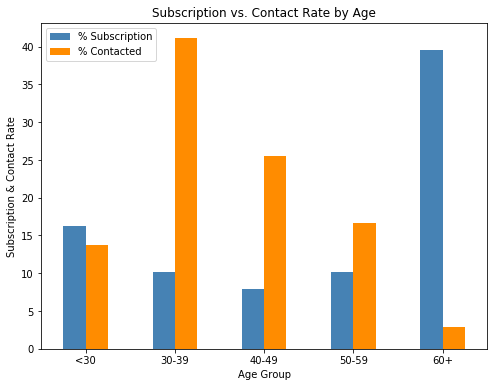

In [127]:
plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('steelblue','darkorange'))
plt.xlabel('Age Group')
plt.ylabel('Subscription & Contact Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

Insights: target the youngest and the oldest instead of the middle-aged<br/>

Blue vertical bars indicate that clients with a age of 60+ have the highest subscription rate. About 17% of the subscriptions came from the clients aged between 18 to 29. More than 50% of the subscriptions are contributed by the youngest and the eldest clients.<br/>

It is not surprising to see such a pattern because the main investment objective of older people is saving for retirement while the middle-aged group tend to be more aggressive with a main objective of generating high investment income. Term deposits, as the least risky investment tool, are more preferable to the eldest.<br/>

The youngest may not have enough money or professional knowledge to engage in sophisticated investments, such as stocks and mutual funds. Term deposits provide liquidity and generate interest incomes that are higher than the regular saving account, so term deposits are ideal investments for students.<br/>

However, orange vertical bars show that the bank focused its marketing efforts on the middle-aged group, which returned lower subscription rates than the younger and older groups. Thus, to make the marketing campaign more effective, the bank should target younger and older clients in the future.<br/>

#### EDA - job

In [129]:
# subscription rate by job
count_job_response_pct = pd.crosstab(df['y'],df['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()

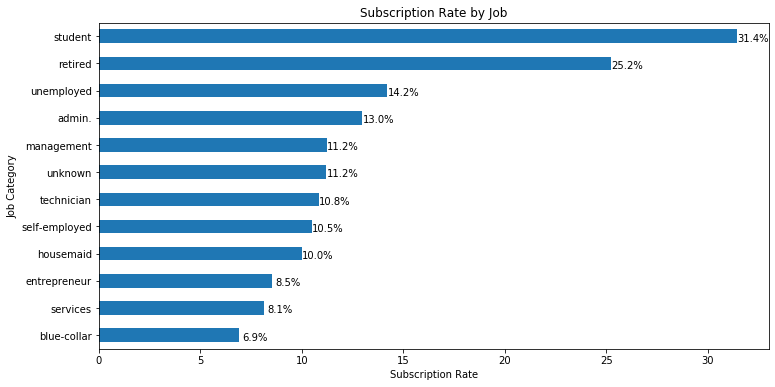

In [130]:
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

Insights: target students and retired clients<br/>

As noted from the horizontal bar chart, students and retired clients account for more than 50% of subscription, which is consistent with the previous finding (in 'age' section) of higher subscription rates among the younger and older.

#### EDA - marital

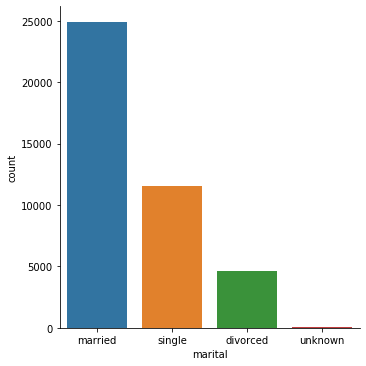

In [152]:
sns.catplot(x="marital", kind="count", data=df)

In the data collected, married clients count the most, followed by the single, the divorced (about 5000) and the unknown (little).

In [146]:
# subscription and contact rate by age
count_marital_response_pct = pd.crosstab(df['y'],df['marital']).apply(lambda x: x/x.sum() * 100)
count_marital_response_pct = count_marital_response_pct.transpose() 

In [149]:
m = pd.DataFrame(df['marital'].value_counts())
m['% Contacted'] = m['marital']*100/m['marital'].sum()
m['% Subscription'] = count_marital_response_pct['yes']
m.drop('marital',axis = 1,inplace = True)

m['m'] = ['married', 'single', 'divorced', 'unknown']
m = m.sort_values('m',ascending = True)

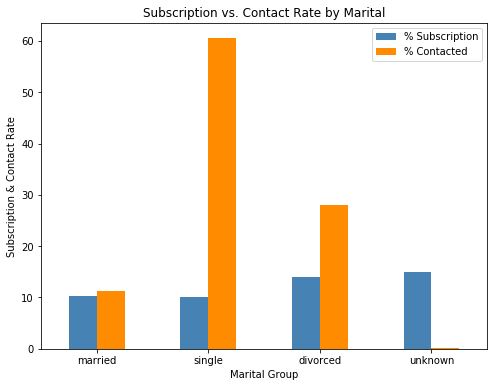

In [181]:
plot_m = m[['% Subscription','% Contacted']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('steelblue','darkorange'))
plt.xlabel('Marital Group')
plt.ylabel('Subscription & Contact Rate')
plt.xticks(np.arange(4), ('married', 'single', 'divorced', 'unknown'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Marital')
plt.show()

Insights: target all the unknown marital status and the divorced first, then the married and the single<br/>

Blue vertical bars indicate that clients with divorced marital status have the 2nd highest subscription rate of 15%. It is because divorced people care more about asset safety and term savings for their living security. <br/>

We also notice that clients with unknown marital status have the highest subscription rate. <br/>

However, orange vertical bars show that the bank focused its marketing efforts on the single group, which returned lower subscription rate than the unknown and divorced groups. Thus, to make the marketing campaign more effective, the bank should first contact all unknown and divorced clients in the future.<br/>

#### EDA - education

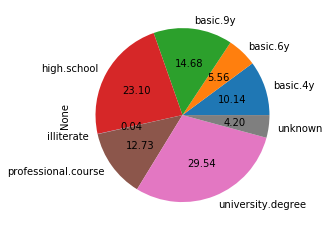

In [166]:
# education overall
df.groupby('education').size().plot(kind='pie', autopct='%.2f')

In [ ]:
df_yes = df.loc[df['y'] == 'yes']
df_no = df.loc[df['y'] == 'no']

AxesSubplot(0.260833,0.125;0.503333x0.755)


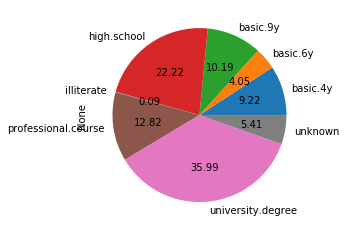

In [165]:
# education by target of 'yes'
print(df_yes.groupby('education').size().plot(kind='pie', autopct='%.2f'))

AxesSubplot(0.260833,0.125;0.503333x0.755)


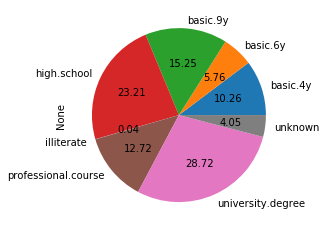

In [164]:
# education by target of 'no'
print(df_no.groupby('education').size().plot(kind='pie', autopct='%.2f'))

A large proportion of clients have a university degree, counting about 30% of all clients. <br/>
Clients with university degree are more willing to subscribe a term deposit, while clients of basic 9y are less willing to subscribe a term deposit.

In [168]:
# subscription and contact rate by education
count_edu_response_pct = pd.crosstab(df['y'],df['education']).apply(lambda x: x/x.sum() * 100)
count_edu_response_pct = count_edu_response_pct.transpose() 

In [172]:
e = pd.DataFrame(df['education'].value_counts())
e['% Contacted'] = e['education']*100/e['education'].sum()
e['% Subscription'] = count_edu_response_pct['yes']
e.drop('education',axis = 1,inplace = True)

e['e'] = ['basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown']
e = e.sort_values('e',ascending = True)

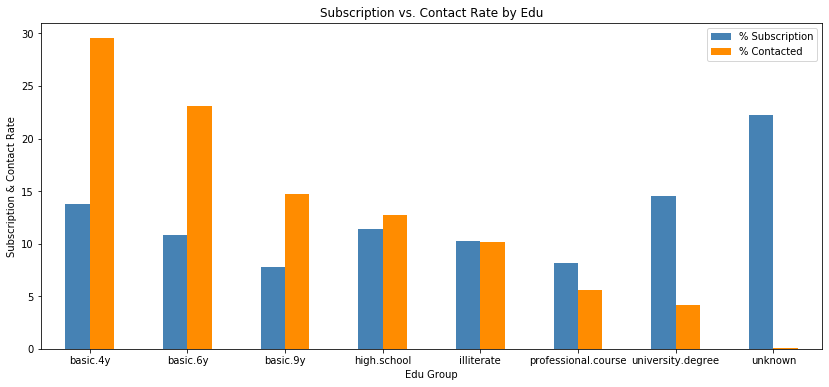

In [182]:
plot_e = e[['% Subscription','% Contacted']].plot(kind = 'bar',
                                              figsize=(14,6), color = ('steelblue','darkorange'))
plt.xlabel('Edu Group')
plt.ylabel('Subscription & Contact Rate')
plt.xticks(np.arange(8), ('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Edu')
plt.show()

Insights: target the unknown education level and the university degree instead of the basic 4y, the basic 6y and the basic 9y.<br/>
Clients with higher education level are more likely to have the investment and asset allocation mindset.

#### EDA - default

In [ ]:
sns.catplot(x="default", hue="y", kind="count", data=df)

In [ ]:
df[df.default=='yes']

only 3 rows have 'default' equal to 'yes'

#### EDA - housing

In [ ]:
sns.catplot(x="housing", hue="y", kind="count", data=df)

The majority of the customers have a housing loan.

#### EDA - loan

In [ ]:
sns.catplot(x="loan", hue="y", kind="count", data=df)

### EDA - attributes related with the last contact of the current campaign

#### EDA - contact

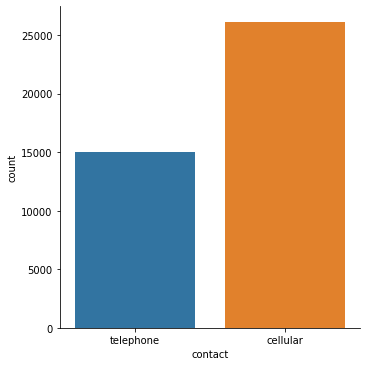

In [188]:
# distribution
sns.catplot(x="contact", kind="count", data=df)

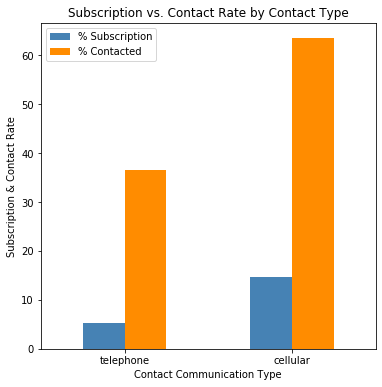

In [186]:
# subscription and contact rate by education
count_con_response_pct = pd.crosstab(df['y'],df['contact']).apply(lambda x: x/x.sum() * 100)
count_con_response_pct = count_con_response_pct.transpose() 

c = pd.DataFrame(df['contact'].value_counts())
c['% Contacted'] = c['contact']*100/c['contact'].sum()
c['% Subscription'] = count_con_response_pct['yes']
c.drop('contact',axis = 1,inplace = True)

c['c'] = ['telephone','cellular']
c = c.sort_values('c',ascending = True)

plot_c = c[['% Subscription','% Contacted']].plot(kind = 'bar',
                                              figsize=(6,6), color = ('steelblue','darkorange'))
plt.xlabel('Contact Communication Type')
plt.ylabel('Subscription & Contact Rate')
plt.xticks(np.arange(2), ('telephone','cellular'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Contact Type')
plt.show()

There is no findings on contact communication type, so 'contact' can be dropped in modeling.

#### EDA - month

In [134]:
# change 'month' from words to numbers for easier analysis
lst = [df]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12

In [135]:
# subscription and contact rate by month
count_month_response_pct = pd.crosstab(df['y'],df['month_int']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()

In [139]:
month = pd.DataFrame(df['month_int'].value_counts())
month

,month_int
5.0,13769
7.0,7174
8.0,6178
6.0,5318
11.0,4101
4.0,2632
10.0,718
9.0,570
3.0,546
12.0,182


In [140]:
month['% Contacted'] = month['month_int']*100/month['month_int'].sum()
month['% Subscription'] = count_month_response_pct['yes']
month.drop('month_int',axis = 1,inplace = True)

month['Month'] = [5,7,8,6,11,4,10,9,3,12]
month = month.sort_values('Month',ascending = True)

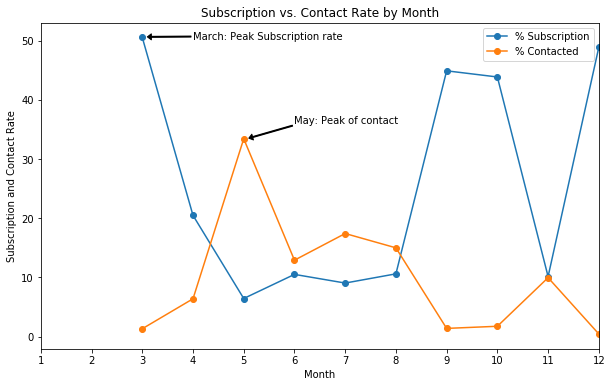

In [141]:
plot_month = month[['% Subscription','% Contacted']].plot(kind ='line',
                                                          figsize = (10,6),
                                                          marker = 'o')

plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')

ticks = np.arange(1,13,1)
plt.xticks(ticks)

# Annotation: peak of contact
y = month['% Contacted'].max()
x = month['% Contacted'].idxmax()
plt.annotate('May: Peak of contact', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# Annotation: peak of subscription rate
y = month['% Subscription'].max()
x = month['% Subscription'].idxmax()
plt.annotate('March: Peak Subscription rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()

Insights: initiate the telemarketing campaign in fall or spring<br/>

Besides customer characteristics, external factors may also have an impact on the subscription rate, such as seasons and the time of calling. So the month of contact is also analyzed here.<br/>

This line chart displays the bank’s contact rate in each month as well as clients’ response rate in each month. One way to evaluate the effectiveness of the bank's marketing plan is to see whether these two lines have a similar trend over the same time horizon.<br/>

1) The bank contacted most clients between May and August. The highest contact rate is around 30%, which happened in May, while the contact rate is closer to 0 in March, September, October, and December.<br/>
2) However, the subscription rate showed a different trend. The highest subscription rate occurred in March, which is over 50%, and all subscription rates in September, October, and December are over 40%.<br/>

Clearly, these two lines move in different directions which strongly indicates the inappropriate timing of the bank’s marketing campaign. To improve the marketing campaign, the bank should consider initiating the telemarketing campaign in fall and spring when the subscription rate tends to be higher.<br/>

Nevertheless, the bank should be cautious when analyzing external factors. More data from previous marketing campaign should be collected and analyzed to make sure that this seasonal effect is constant over time and applicable to the future.

#### EDA - day_of_week

In [ ]:
sns.catplot(x="day_of_week", hue="y", kind="count", data=df)

All the days have the similar distribution for both the classes. We can deduce that this feature will not be very helpful in predicting the target variable.

#### EDA - duration

In [110]:
df['duration'] = df['duration'].apply(lambda n:n/60).round(2)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bb02722a08>,
 'caps': [<matplotlib.lines.Line2D at 0x1bb02722f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bb02721748>],
 'medians': [<matplotlib.lines.Line2D at 0x1bb0271efc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bb0271ef88>],
 'means': []}

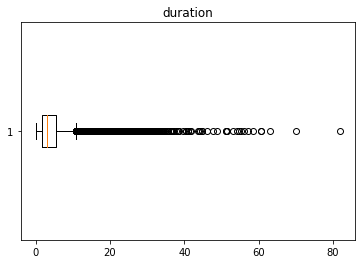

In [111]:
# distribution in boxplot
fig, ax = plt.subplots()
ax.set_title('duration')
ax.boxplot(df.duration, vert=False)

distribution of duration: As observed from the box plot and profile, the duration of contact has a median of 3 minutes, with an interquartile range of 1.73 minutes to 5.3 minutes. The left-skewed boxplot indicates that most calls are relatively short. Also, there is a large number of outliers ranging from 10 minutes to 40 minutes, which are worth further study.

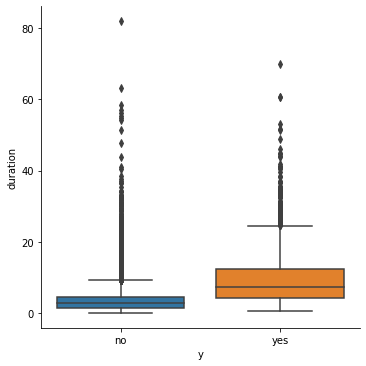

In [112]:
# distribution by target
sns.catplot(x='y', y='duration', kind='box', data=df)

It is already mentioned in the data overview that duration highly affects the target variable and should only be used for benchmark purposes.

In [ ]:
# check 'campaign' for more visualization

#### EDA - year

The feature is created to reflect time changes by year.

In [66]:
df_2008 = df.loc[df['year'] == 2008]
df_2009 = df.loc[df['year'] == 2009]
df_2010 = df.loc[df['year'] == 2010]

In [79]:
df.groupby(by=['year','y']).size()

year  y  
2008  no     26351
      yes     1339
2009  no      9212
      yes     2228
2010  no       985
      yes     1073
dtype: int64

In [85]:
# 2008
df_2008.groupby(by=['y']).size()/len(df_2008)

y
no     0.951643
yes    0.048357
dtype: float64

In [84]:
# 2009
df_2009.groupby(by=['y']).size()/len(df_2009)

y
no     0.805245
yes    0.194755
dtype: float64

In [83]:
# 2010
df_2010.groupby(by=['y']).size()/len(df_2010)

y
no     0.47862
yes    0.52138
dtype: float64

The proportion of subscriber increase from 2008 to 2010.

In [190]:
#df_2008.groupby(by=['month','y']).size()

In [189]:
#df_2008.groupby(by=['month','y']).size()/len(df_2008)

### EDA - other attributes

#### EDA - campaign

distribution of campagin: From the profile, we see about half of the clients have been contacted by the bank for the second time, while 25% was first introduced to the term deposits. Most clients have been reached by the bank for one to three times, which is reasonable. However, some clients have been contacted by as high as 58 times, which is not normal. These clients may have some special needs that require frequent contact.

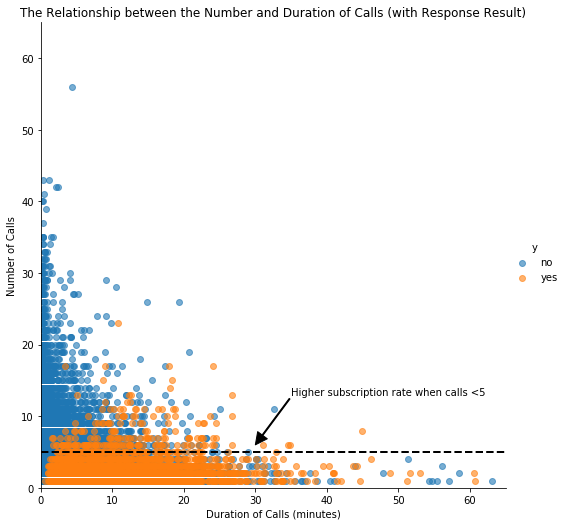

In [119]:
# relationship between 'duration' & 'campaign' (with response result/target) 
dur_cam = sns.lmplot(x='duration', y='campaign',data = df,
                     hue = 'y',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

# Annotation
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when calls <5',xytext = (35,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.show()

In this scatter plot, clients subscribed to term deposits are denoted as "yes" while those did not are denoted as "no".<br>

As we can see from the plot, “yes” clients and “no” clients are forming two relatively separate clusters. Compared to “no” clients”, “yes” clients were contacted by fewer times and had longer call duration. More importantly, after five campaign calls, clients are more likely to reject the term deposit unless the duration is high. Most “yes” clients were approached by less than 10 times.<br>

This suggests that the bank should resist calling a client for more than five times, which can be disturbing and increase dissatisfaction.

#### EDA - pdays

In [ ]:
sns.catplot(x='y', y='pdays', kind='box', data=df)
sns.displot(df, x='pdays', col='y')

Most of the values are 999, which means that the most of the customers have never been contacted before.

#### EDA - previous

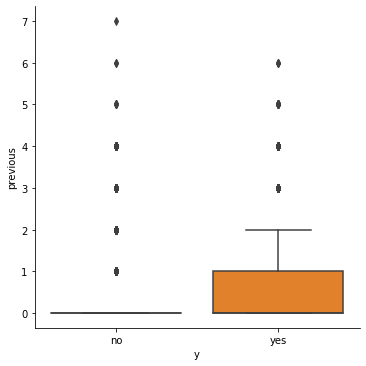

In [106]:
sns.catplot(x='y', y='previous', kind='box', data=df)

From the profile , we know that previous has 86.3% zeros.<br/>
We can assume that the more previous contacts made, the more likely customers will subscribe a long term deposit.

#### EDA - poutcome

In [ ]:
sns.catplot(x="poutcome", hue="y", kind="count", data=df)

For most of the customers, the previous marketing campaign outcome does not exists. It means that most of the customers are new customers who have not been contacted earlier.<br/>
For the customers who had a successful outcome from the previous campaign, majority of those customers did subscribe for a term deposit. From this, we can make an assumption that this feature may hold some value in predicting the target variable. specially poutcome_success category.

### EDA - social and economic context attributes

#### EDA - nr.employed

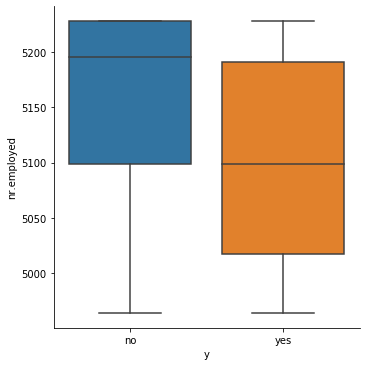

In [33]:
sns.catplot(x='y', y='nr.employed', kind='box', data=df)

It seems that there are more subscribers with fewer employees.

In [11]:
print(sum(df.year == 2008))
print(sum(df.year == 2009))
print(sum(df.year == 2010))

27690
11440
2058


2008: count = 27690, row_number = [1, 27690]<br/>
2009: count = 11440, row_number = [27691, 39130]<br/>
2010: count = 2058, row_number = [39131, 41188]

No handles with labels found to put in legend.


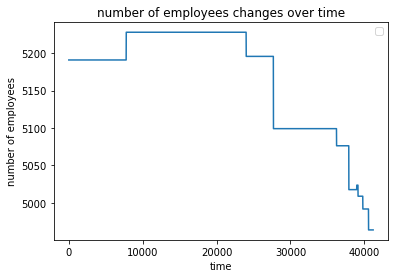

In [456]:
#sns.displot(df, x='nr.employed', col='row_number')
plt.plot(df['row_number'],df['nr.employed'])
plt.title('number of employees changes over time')
plt.xlabel('time')
plt.ylabel('number of employees')
plt.legend()
plt.show()

During 2008, the number of employees remained at a high level, and went down in the following quarters.


From the EDA above, we can find that some metrics were not stable in the given time frame (from May 2008 to November 2010).<br/>
Therefore, the population stability is a big problem, i.e. people preference has been changing and the model would not be accurate when time passing. <br/>
So next I will calculate the PSI (population stability index) for variables and samples in difference time period to verify that.


In [55]:
# define PSI
def calculate_psi(expected, actual, buckettype='bins', buckets=10, axis=0):
    '''Calculate the PSI (population stability index) across all variables
    Args:
       expected: numpy matrix of original values
       actual: numpy matrix of new values, same size as expected
       buckettype: type of strategy for creating buckets, bins splits into even splits, quantiles splits into quantile buckets
       buckets: number of quantiles to use in bucketing variables
       axis: axis by which variables are defined, 0 for vertical, 1 for horizontal
    Returns:
       psi_values: ndarray of psi values for each variable
    Author:
       Matthew Burke
       github.com/mwburke
       worksofchart.com
    '''

    def psi(expected_array, actual_array, buckets):
        '''Calculate the PSI for a single variable
        Args:
           expected_array: numpy array of original values
           actual_array: numpy array of new values, same size as expected
           buckets: number of percentile ranges to bucket the values into
        Returns:
           psi_value: calculated PSI value
        '''

        def scale_range (input, min, max):
            input += -(np.min(input))
            input /= np.max(input) / (max - min)
            input += min
            return input


        breakpoints = np.arange(0, buckets + 1) / (buckets) * 100

        if buckettype == 'bins':
            breakpoints = scale_range(breakpoints, np.min(expected_array), np.max(expected_array))
        elif buckettype == 'quantiles':
            breakpoints = np.stack([np.percentile(expected_array, b) for b in breakpoints])



        expected_percents = np.histogram(expected_array, breakpoints)[0] / len(expected_array)
        actual_percents = np.histogram(actual_array, breakpoints)[0] / len(actual_array)

        def sub_psi(e_perc, a_perc):
            '''Calculate the actual PSI value from comparing the values.
               Update the actual value to a very small number if equal to zero
            '''
            if a_perc == 0:
                a_perc = 0.0001
            if e_perc == 0:
                e_perc = 0.0001

            value = (e_perc - a_perc) * np.log(e_perc / a_perc)
            return(value)

        psi_value = np.sum(np.fromiter((sub_psi(expected_percents[i], actual_percents[i]) for i in range(0, len(expected_percents))),dtype=float))
        #psi_value = np.sum(sub_psi(expected_percents[i], actual_percents[i]) for i in range(0, len(expected_percents)))

    #np.sum(generator) -  deprecated   
    #np.sum(np.fromiter(generator)) 
        return(psi_value)

    if len(expected.shape) == 1:
        psi_values = np.empty(len(expected.shape))
    else:
        psi_values = np.empty(expected.shape[axis])

    for i in range(0, len(psi_values)):
        if len(psi_values) == 1:
            psi_values = psi(expected, actual, buckets)
        elif axis == 0:
            psi_values[i] = psi(expected[:,i], actual[:,i], buckets)
        elif axis == 1:
            psi_values[i] = psi(expected[i,:], actual[i,:], buckets)

    return(psi_values)

In [56]:
'''
# PSI example
rs = np.random.RandomState(5)
expected = rs.normal(size = 100)
actual = rs.normal(loc = 0.2, size = 120)
'''

'\n# PSI example\nrs = np.random.RandomState(5)\nexpected = rs.normal(size = 100)\nactual = rs.normal(loc = 0.2, size = 120)\n'

In [57]:
# select top 1000 and bottom 1000 rows respectively
expected_nr_employed = df['nr.employed'][0:1000].values
actual_nr_employed = df['nr.employed'][-1000:].values

In [58]:
# PSI of 'nr.employed' (number of employees, quarterly)
calculate_psi(expected_nr_employed, actual_nr_employed, buckettype='bins', buckets=10, axis=0)

C:\Users\yangz\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in double_scalars


9.209419337938986

PSI rules:<br/>
PSI < 0.1 - No change.<br/>
PSI >=0.1 but less than 0.2 - Slight change is required. <br/>
PSI >=0.2 - Significant change is required.<br/>

The PSI of 'nr.employed' is 9.2, which shows that the 'nr.employed' during the given time frame is not applicable in prediction model.

#### EDA - emp.var.rate

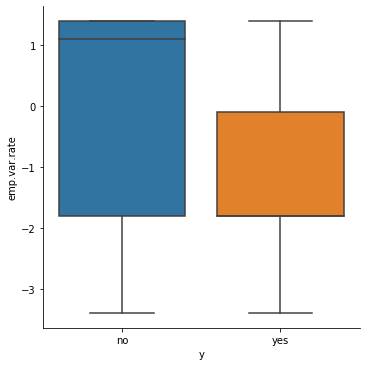

In [35]:
sns.catplot(x='y', y='emp.var.rate', kind='box', data=df)

In [21]:
df_yes = df.loc[df['y'] == 'yes']
df_yes['emp.var.rate'].mean() #-1.2334482758620953
df_yes['emp.var.rate'].median() #-1.8

-1.8

It seems that there are more subscribers when employment variation rate <0 (employment goes down).<br/>
Also, when employment rate goes down, customers are more likely to subscribe a long term deposit.

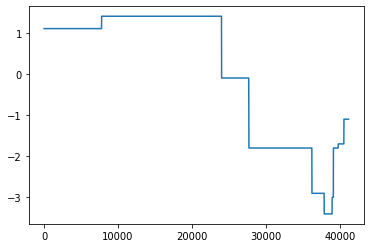

In [36]:
plt.plot(df['row_number'],df['emp.var.rate'])

The employment variation rate went down drastically from the end of 2008 to the end of 2009, and went up from 2010.<br/>
We can see the financial crisis has a direct impact on employment, which decrease since October 2008.<br/>
From Tableau's plot, we see that from Oct 2008, employment var rate < 0, which means that employment went down since then.

In [59]:
# PSI of 'emp.var.rate' (employment variation rate, quarterly)
expected_emp_var_rate = df['emp.var.rate'][0:1000].values
actual_emp_var_rate = df['emp.var.rate'][-1000:].values
calculate_psi(expected_emp_var_rate, actual_emp_var_rate, buckettype='bins', buckets=10, axis=0)

C:\Users\yangz\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in double_scalars


9.209419337938986

The PSI of 'emp.var.rate' is 9.2, which shows that the original 'emp.var.rate' data cannot be directly used for prediction.

#### EDA - cons.price.idx

The Consumer Price Index (CPI) is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services. <br/>
CPI_t = C_t/C_o * 100, where CPI_t is consumer price index in current period, C_t is cost of market basket in current period, C_o is cost of market basket in base period.

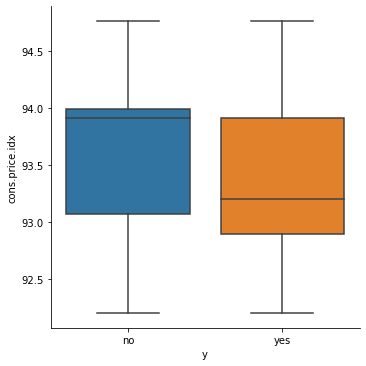

In [38]:
sns.catplot(x='y', y='cons.price.idx', kind='box', data=df)

The CPI in given data's time frame is under 100, meaning that the economy is worse than the baseline, probably due to financial crisis.<br/>
note: Currently, the reference base for most CPI indexes is 1982- 84=100.<br/>
Also, When CPI is lower, the same basket of product become cheaper, and people may have more money to invest in term deposits, so there are more subscribers.

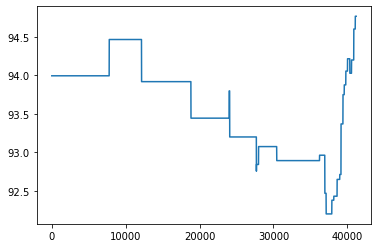

In [22]:
plt.plot(df['row_number'],df['cons.price.idx'])

The CPI reflects the macro economy performance. When CPI goes up, it shows inflation and currency devaluation, and customers are more willing to consume.<br/>
In the given data, CPI went down through 2008 and 2009, and then went up in 2010. During economic downturn, CPI went up since 2010, which is a positive market signal of economy stabilizing and rebounding.

In [60]:
expected_cons_price_idx = df['cons.price.idx'][0:1000].values
actual_cons_price_idx = df['cons.price.idx'][-1000:].values
calculate_psi(expected_cons_price_idx, actual_cons_price_idx, buckettype='bins', buckets=10, axis=0)

C:\Users\yangz\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in double_scalars


9.209419337938986

Similarly, 'cons.price.idx' cannot be used directly.

#### EDA - cons.conf.idx

CCI is defined as the degree of optimism on the economy that consumers are expressing through their activities of savings and spending.<br/>
Values below 100 indicate a pessimistic attitude towards future developments in the economy, possibly resulting in a tendency to save more and consume less.<br/>
Declining consumer confidence is a sign of slowing economic growth.

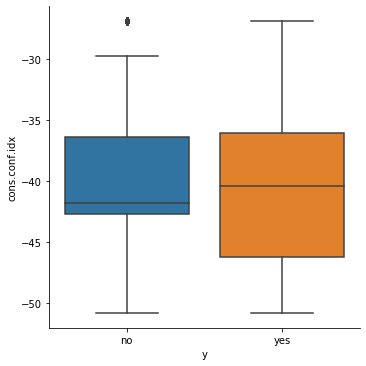

In [25]:
sns.catplot(x='y', y='cons.conf.idx', kind='box', data=df)

Based on given time frame, there was a pessimistic attitude towards future developments in the economy, possibly resulting in a tendency to save more and consume less, so more people tend to subscribe a term deposit.<br/>
And we can see that when CCI is under -43, all clients chose to subscribe term deposits.

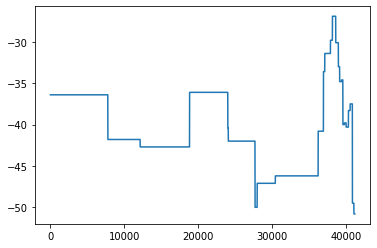

In [26]:
plt.plot(df['row_number'],df['cons.conf.idx'])

In [48]:
expected_cons_price_idx

array([93.994, 93.994, 93.994, 93.994, 93.994, 93.994, 93.994, 93.994,
       93.994, 93.994, 93.994, 93.994, 93.994, 93.994, 93.994, 93.994,
       93.994, 93.994, 93.994, 93.994, 93.994, 93.994, 93.994, 93.994,
       93.994, 93.994, 93.994, 93.994, 93.994, 93.994, 93.994, 93.994,
       93.994, 93.994, 93.994, 93.994, 93.994, 93.994, 93.994, 93.994,
       93.994, 93.994, 93.994, 93.994, 93.994, 93.994, 93.994, 93.994,
       93.994, 93.994, 93.994, 93.994, 93.994, 93.994, 93.994, 93.994,
       93.994, 93.994, 93.994, 93.994, 93.994, 93.994, 93.994, 93.994,
       93.994, 93.994, 93.994, 93.994, 93.994, 93.994, 93.994, 93.994,
       93.994, 93.994, 93.994, 93.994, 93.994, 93.994, 93.994, 93.994,
       93.994, 93.994, 93.994, 93.994, 93.994, 93.994, 93.994, 93.994,
       93.994, 93.994, 93.994, 93.994, 93.994, 93.994, 93.994, 93.994,
       93.994, 93.994, 93.994, 93.994, 93.994, 93.994, 93.994, 93.994,
       93.994, 93.994, 93.994, 93.994, 93.994, 93.994, 93.994, 93.994,
      

From 2008 to 2010, there was a pessimistic attitude towards future developments in the economy.<br/>
It shows that in the end of 2009, the CCI was relatively lower than other time period, showing a low economic growth.

In [61]:
expected_cons_conf_idx = df['cons.conf.idx'][0:1000].values
actual_cons_conf_idx = df['cons.conf.idx'][-1000:].values
calculate_psi(expected_cons_conf_idx, actual_cons_conf_idx, buckettype='bins', buckets=10, axis=0)

C:\Users\yangz\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in double_scalars


9.209419337938986

Similarly, 'cons.conf.idx' cannot be used directly.

#### EDA -  euribor3m

The euribor denotes the basic rate of interest used in lending between banks on the European Union interbank market and also used as a reference for setting the interest rate on other loans.<br/>
relationship link: euribor - reserve amount - euro short-term interest rates in the European market<br/>
The 3 month Euribor interest rate is the interest rate at which a selection of European banks lend one another funds denominated in euros whereby the loans have a maturity of 3 months.<br/>

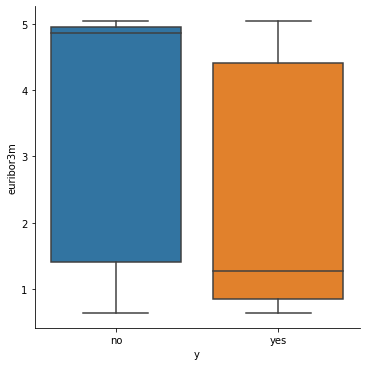

In [62]:
sns.catplot(x='y', y='euribor3m', kind='box', data=df)

From the above plot, we can clearly see the difference in median for both the classes. This indicates that euribor 3 month rate can be very useful for our case study. But we can validate the assumption only by applying models and extracting feature importance.

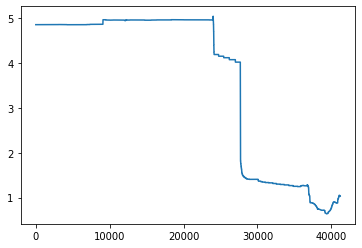

In [65]:
plt.plot(df['row_number'],df['euribor3m'])

The euribor 3 month rate went down continuously from the end of 2008 to the end of 2019, showing that capital supply exceeded capital demand, people are less likely to consume, term deposits subcription willingness increase.

In [64]:
# PSI
expected_euribor3m = df['euribor3m'][0:1000].values
actual_euribor3m = df['euribor3m'][-1000:].values
calculate_psi(expected_euribor3m, actual_euribor3m, buckettype='bins', buckets=10, axis=0)

8.653020382378568

Similarly, 'euribor3m' cannot be used directly although it was more stable than other economic variables.

# Note: Please find 'data cleaning' in 'modeling prep' section.

# Deployed Model Evaluation

In [191]:
# metric

In general, to evaluate the quality of classification model, the metrics include accuracy, precision, recall/sensitivity, F1 score and ROC/AUC.<br/>

Here I choose AUROC(AUC) to evaluate the deployed model.<br/>

ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. In the case study, higher the AUC, better the model is at distinguishing between clients with subscription receptiveness and no subscription receptiveness of bank term deposit.<br/>

In addition, it can later help decide which categorical method is better.<br/>

Advantage of AUROC:<br/>
1) It measures “overall diagnostic performance” since ROC AUC is averaged across all possible diagnostic thresholds.<br/>
2) It is claimed to account for different thresholds between readers (“response criteria”) and different curves are compared easily.<br/>

In [ ]:
# performance

In [193]:
# calculate AUC score of the deployed model
dm_auc = metrics.roc_auc_score(df.y,df.ModelPrediction)
print(dm_auc)

0.23531485696184137


In [ ]:
# evaluation

A predictor which makes random guesses has an AUC score of 0.5.<br/>
The AUC is lower than 0.5, showing that the current classifer has a bad performance.<br/>
So I suggest the bank ought to replace the current model.

conclusions from EDA and next step to do:<br/>
1) dataset is highly imbalanced (1:9)<br/>
2) 12 duplicate rows should be deleted<br/>
3) euribor3m, emp.var.rate, nr.employed are highly correlated<br/>
4) some variables (e.g. previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, etc.) may be useful in prediction<br/>
5）'duration' should only be used for benchmark purpose, not for prediction<br/>
6) 'pdays' has value of 999, which should be converted for modeling

# Modeling Prep

In [412]:
df = pd.read_csv('C:/Users/yangz/Desktop/job and interview/Quicken Loans/DSA Data Set_new.csv')
df.head()

,row_number,age,job,marital,education,default,housing,loan,contact,month,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y,year
0,1,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no,2008
1,2,57,services,married,high.school,unknown,no,no,telephone,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no,2008
2,3,37,services,married,high.school,no,yes,no,telephone,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no,2008
3,4,40,admin.,married,basic.6y,no,no,no,telephone,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no,2008
4,5,56,services,married,high.school,no,no,yes,telephone,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no,2008


In [397]:
df.shape

(41188, 24)

Currently, the dataset has 24 columns:<br/>

13 numerical features: row_number, age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m,  nr.employed, ModelPrediction, year <br/>

11 categorical features: job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, y <br/>

### check for missing values

In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 24 columns):
row_number         41188 non-null int64
age                41188 non-null int64
job                41188 non-null object
marital            41188 non-null object
education          41188 non-null object
default            41188 non-null object
housing            41188 non-null object
loan               41188 non-null object
contact            41188 non-null object
month              41188 non-null object
day_of_week        41188 non-null object
duration           41188 non-null int64
campaign           41188 non-null int64
pdays              41188 non-null int64
previous           41188 non-null int64
poutcome           41188 non-null object
emp.var.rate       41188 non-null float64
cons.price.idx     41188 non-null float64
cons.conf.idx      41188 non-null float64
euribor3m          41188 non-null float64
nr.employed        41188 non-null float64
ModelPrediction    41188 non-nu

All features are non-null, no missing values.

### drop variables

‘duration’: prevent information leaking in prediction<br/>
‘contact’: not helpful on modeling based on EDA<br/>
‘prediction’: remove deployed model’s result
'row_number' & 'year': added only for EDA

In [413]:
df = df.drop(['row_number','year','duration','contact','ModelPrediction'], axis = 1)
df.shape

(41188, 19)

### transform variables

In [414]:
# convert 'pdays' from numeric to categorical
df['pdays_dummy'] = [0 if x == 999 else 1 for x in df.pdays]
df = df.drop(['pdays'], axis = 1)
df.head()


,age,job,marital,education,default,housing,loan,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_dummy
0,56,housemaid,married,basic.4y,no,no,no,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [238]:
# One hot Encoding the categorical variables

One Hot Encoding method is to create categorical data with using get dummies function. One hot encoding is a process by which categorical variables are converted into matrix form with 1 and 0 values.

In [401]:
# filter out categorical variables
cols_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'day_of_week', 'poutcome'] # without 'pdays_dummy'

In [415]:
cols_dummy_cat = pd.get_dummies(df[cols_cat], drop_first = False) # creating dummies for categorical variables
df = pd.concat([df, cols_dummy_cat], axis = 1)
df = df.drop(columns = cols_cat, axis = 1) # removing original categorical variables
df

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_dummy,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,0,-1.1,94.767,-50.8,1.028,4963.6,yes,0,...,0,0,1,0,0,0,0,0,1,0
41184,46,1,0,-1.1,94.767,-50.8,1.028,4963.6,no,0,...,0,0,1,0,0,0,0,0,1,0
41185,56,2,0,-1.1,94.767,-50.8,1.028,4963.6,no,0,...,0,0,1,0,0,0,0,0,1,0
41186,44,1,0,-1.1,94.767,-50.8,1.028,4963.6,yes,0,...,0,0,1,0,0,0,0,0,1,0


In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 61 columns):
age                              41188 non-null int64
campaign                         41188 non-null int64
previous                         41188 non-null int64
emp.var.rate                     41188 non-null float64
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr.employed                      41188 non-null float64
y                                41188 non-null object
pdays_dummy                      41188 non-null int64
job_admin.                       41188 non-null uint8
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_retired                      41188 non-null uint8
job_self-employe

In [417]:
# convert 'y' to 'y_label'
df['y_label'] = [1 if x == 'yes' else 0 for x in df['y']]
df = df.drop(['y'], axis = 1)

### drop duplicate rows

In [418]:
# checking for duplicate records
duplicate = data[data.duplicated()]
duplicate #12 rows

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0.945200,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,0.956465,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0.956728,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0.961048,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0.955202,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0.970002,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0.956788,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0.932301,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,0.842341,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0.827244,no


In [419]:
# get indexes of duplicate
duplicate.index #[1266, 12261, 14234, 16956, 18465, 20216, 20534, 25217, 28477,32516, 36951, 38281]

Int64Index([ 1266, 12261, 14234, 16956, 18465, 20216, 20534, 25217, 28477,
            32516, 36951, 38281],
           dtype='int64')

In [407]:
# select duplicate rows in df
df.iloc[[1266, 12261, 14234, 16956, 18465, 20216, 20534, 25217, 28477,32516, 36951, 38281], :]

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,year,pdays_dummy,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_label
1266,39,1,0,1.1,93.994,-36.4,4.855,5191.0,2008,0,...,0,0,0,1,0,0,0,1,0,0
12261,36,1,0,1.4,93.918,-42.7,4.966,5228.1,2008,0,...,0,0,0,1,0,0,0,1,0,0
14234,27,2,0,1.4,93.918,-42.7,4.962,5228.1,2008,0,...,0,0,1,0,0,0,0,1,0,0
16956,47,3,0,1.4,93.918,-42.7,4.962,5228.1,2008,0,...,0,0,0,1,0,0,0,1,0,0
18465,32,1,0,1.4,93.918,-42.7,4.968,5228.1,2008,0,...,0,0,0,1,0,0,0,1,0,0
20216,55,1,0,1.4,93.444,-36.1,4.965,5228.1,2008,0,...,0,0,1,0,0,0,0,1,0,0
20534,41,1,0,1.4,93.444,-36.1,4.966,5228.1,2008,0,...,0,0,0,0,1,0,0,1,0,0
25217,39,2,0,-0.1,93.200,-42.0,4.153,5195.8,2008,0,...,0,0,0,0,1,0,0,1,0,0
28477,24,1,0,-1.8,93.075,-47.1,1.423,5099.1,2009,0,...,0,0,0,0,1,0,0,1,0,0
32516,35,4,0,-1.8,92.893,-46.2,1.313,5099.1,2009,0,...,0,1,0,0,0,0,0,1,0,0


In [420]:
# drop duplicate rows in df
df = df.drop([1266, 12261, 14234, 16956, 18465, 20216, 20534, 25217, 28477,32516, 36951, 38281])
df.shape

(41176, 61)

In [421]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
...,...,...,...,...,...,...,...,...
day_of_week_wed,41176.0,0.197542,0.398150,0.000,0.000,0.000,0.000,1.000
poutcome_failure,41176.0,0.103264,0.304307,0.000,0.000,0.000,0.000,1.000
poutcome_nonexistent,41176.0,0.863391,0.343438,0.000,1.000,1.000,1.000,1.000
poutcome_success,41176.0,0.033345,0.179537,0.000,0.000,0.000,0.000,1.000


In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 61 columns):
age                              41176 non-null int64
campaign                         41176 non-null int64
previous                         41176 non-null int64
emp.var.rate                     41176 non-null float64
cons.price.idx                   41176 non-null float64
cons.conf.idx                    41176 non-null float64
euribor3m                        41176 non-null float64
nr.employed                      41176 non-null float64
pdays_dummy                      41176 non-null int64
job_admin.                       41176 non-null uint8
job_blue-collar                  41176 non-null uint8
job_entrepreneur                 41176 non-null uint8
job_housemaid                    41176 non-null uint8
job_management                   41176 non-null uint8
job_retired                      41176 non-null uint8
job_self-employed                41176 non-null uint8
job_services     

At this stage, the dataset has 61 columns:<br/>

8 numerical features: age, campaign, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed<br/>

53 categorical features: pdays_dummy, job_ (*12), marital_ (*4), education_ (*8), default_ (*3), housing_ (*3), loan_ (*3), month_ (*10), day_of_week_ (*5), poutcome_ (*3), y_label <br/>

# Modeling Prep

### split the data

Suppose using the split as follows, training: 70%, validation: 15%, test: 15%. <br/>
So row counts in each sample is, training: 28823, validation: 6177, test: 6176. <br/>
Given that the training data (training and validation sets) includes a large number of contacts (35,000), we adopt the popular and fast holdout method for feature and model selection purposes. <br/>

Thus, we get the following split:<br/>
70%, Training samples: these samples are used to train the model<br/>
15%, Validation samples: these samples are held out from the training data and are used to make decisions on how to improve the model<br/>
15%, Test samples: these samples are held out from all decisions and are used to test (measure) the generalized performance of the model

In [423]:
df_valid_and_test = df.sample(frac = 0.30, random_state = 1)
df_test = df_valid_and_test.sample(frac = 0.5, random_state = 1)
df_valid = df_valid_and_test.drop(df_test.index)
df_train = df.drop(df_valid_and_test.index)

In [424]:
print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)

(28823, 61)
(6177, 61)
(6176, 61)


In [425]:
# detect prevalence of 3 samples
def calc_prevalence(y): # this function calculates the prevalence of the positive class (label = 1)
    return (sum(y)/len(y))
print('df_train prevalence(n = %d): %.3f'%(len(df_train), calc_prevalence(df_train.y_label.values)))
print('df_valid prevalence(n = %d): %.3f'%(len(df_valid), calc_prevalence(df_valid.y_label.values)))
print('df_test prevalence(n = %d): %.3f'%(len(df_test), calc_prevalence(df_test.y_label.values)))

df_train prevalence(n = 28823): 0.113
df_valid prevalence(n = 6177): 0.111
df_test prevalence(n = 6176): 0.114


The prevalence of the positive class is about the same as that of whole dataset. The samples are good for next step's analysis.

### balance the data

From previous analysis, we know that the dataset is imbalanced and has a skewed class distribution. 11.3% of target variable is 1/yes (4640) and the rest (88.7%) is 0/no (36548). <br/>

Considering reducing chance of overfitting, I will use undersampling to balance the class distribution to 1:1 although it may cause loss of some information in data.

In [426]:
df_train_class1 = df_train[df_train.iloc[:,-1] == 1]
df_train_class0 = df_train[df_train.iloc[:,-1] == 0]
df_train = pd.concat([df_train_class1, df_train_class0.sample(n = len(df_train_class1), random_state = 1)], axis = 0)

df_valid_class1 = df_valid[df_valid.iloc[:,-1] == 1]
df_valid_class0 = df_valid[df_valid.iloc[:,-1] == 0]
df_valid = pd.concat([df_valid_class1, df_valid_class0.sample(n = len(df_valid_class1), random_state = 1)], axis = 0)

In [427]:
df_train.shape #(6506, 63)

(6506, 61)

In [428]:
len(df_train.loc[df_train.y_label==1]) #3253 rows

3253

### standardize the data

Before fitting models, the input data will be first standardized to a zero mean and one standard deviation. The reason to do this is to avoid one independent variable dominating the other, and to make computations easy.<br/>

Here I will apply the StandardScaler to the 3 samples to standardize the input variables. I will use the default configuration and scale values to subtract the mean to center them on 0.0 and divide by the standard deviation to give the standard deviation of 1.0.

In [429]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [430]:
cols_x = list(df)[0:-1]
len(cols_x) #60

60

In [431]:
# create arrays
x_train = df_train[cols_x].values
x_valid = df_valid[cols_x].values
x_test = df_test[cols_x].values
y_train = df_train['y_label'].values
y_valid = df_valid['y_label'].values
y_test = df_test['y_label'].values

In [432]:
x_train

array([[41.,  1.,  0., ...,  0.,  1.,  0.],
       [49.,  1.,  0., ...,  0.,  1.,  0.],
       [41.,  1.,  0., ...,  0.,  1.,  0.],
       ...,
       [30.,  1.,  0., ...,  0.,  1.,  0.],
       [27.,  1.,  0., ...,  0.,  1.,  0.],
       [28.,  1.,  0., ...,  0.,  1.,  0.]])

In [433]:
x_valid

array([[26.,  1.,  1., ...,  0.,  0.,  1.],
       [46.,  5.,  0., ...,  0.,  1.,  0.],
       [33.,  4.,  0., ...,  0.,  1.,  0.],
       ...,
       [27.,  3.,  1., ...,  1.,  0.,  0.],
       [49., 10.,  0., ...,  0.,  1.,  0.],
       [26.,  2.,  0., ...,  0.,  1.,  0.]])

In [434]:
x_test

array([[31.,  1.,  0., ...,  0.,  1.,  0.],
       [38.,  2.,  0., ...,  0.,  1.,  0.],
       [57.,  4.,  0., ...,  0.,  1.,  0.],
       ...,
       [31.,  1.,  0., ...,  0.,  1.,  0.],
       [44.,  2.,  0., ...,  0.,  1.,  0.],
       [62.,  4.,  0., ...,  0.,  1.,  0.]])

In [435]:
y_train

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [436]:
y_valid

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [437]:
y_test

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [438]:
# scaling
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [439]:
x_train

array([[ 0.04927762, -0.59179262, -0.44720523, ..., -0.36232791,
         0.52672538, -0.33543569],
       [ 0.71806551, -0.59179262, -0.44720523, ..., -0.36232791,
         0.52672538, -0.33543569],
       [ 0.04927762, -0.59179262, -0.44720523, ..., -0.36232791,
         0.52672538, -0.33543569],
       ...,
       [-0.87030573, -0.59179262, -0.44720523, ..., -0.36232791,
         0.52672538, -0.33543569],
       [-1.12110119, -0.59179262, -0.44720523, ..., -0.36232791,
         0.52672538, -0.33543569],
       [-1.0375027 , -0.59179262, -0.44720523, ..., -0.36232791,
         0.52672538, -0.33543569]])

In [440]:
x_valid

array([[-1.20469968, -0.59179262,  1.00031577, ..., -0.36232791,
        -1.89852254,  2.98119741],
       [ 0.46727005,  1.22455495, -0.44720523, ..., -0.36232791,
         0.52672538, -0.33543569],
       [-0.61951027,  0.77046806, -0.44720523, ..., -0.36232791,
         0.52672538, -0.33543569],
       ...,
       [-1.12110119,  0.31638117,  1.00031577, ...,  2.75993089,
        -1.89852254, -0.33543569],
       [ 0.71806551,  3.49498941, -0.44720523, ..., -0.36232791,
         0.52672538, -0.33543569],
       [-1.20469968, -0.13770572, -0.44720523, ..., -0.36232791,
         0.52672538, -0.33543569]])

In [441]:
x_test

array([[-0.78670724, -0.59179262, -0.44720523, ..., -0.36232791,
         0.52672538, -0.33543569],
       [-0.20151784, -0.13770572, -0.44720523, ..., -0.36232791,
         0.52672538, -0.33543569],
       [ 1.3868534 ,  0.77046806, -0.44720523, ..., -0.36232791,
         0.52672538, -0.33543569],
       ...,
       [-0.78670724, -0.59179262, -0.44720523, ..., -0.36232791,
         0.52672538, -0.33543569],
       [ 0.30007308, -0.13770572, -0.44720523, ..., -0.36232791,
         0.52672538, -0.33543569],
       [ 1.80484584,  0.77046806, -0.44720523, ..., -0.36232791,
         0.52672538, -0.33543569]])

# Models

In [442]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from time import time
#pip install scikit-plot
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC 
#pip install xgboost
import xgboost as xgb

In [443]:
# define all evaluation metrics
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    f1 = round(f1_score(labels, pred), 3)
    auroc = round(roc_auc_score(labels, pred), 3)
    
    print('{} -- Accuracy:{} / Precision:{} / Recall:{} / F1:{} / AUROC:{} / Latency:{}ms'.format(name, accuracy, precision, recall, f1, auroc, round(end-start)))

### LR

In [461]:
# LR baseline model
lr = LogisticRegression(random_state = 1)
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_valid)
evaluate_model('LR', lr, x_valid, y_valid)

LR -- Accuracy:0.752 / Precision:0.831 / Recall:0.632 / F1:0.718 / AUROC:0.752 / Latency:0ms


In [ ]:
# recall, precision, ROC/AUC

Recall(Sensitivity): This tells out of actual positive data, how many times you predicted correctly. Since the bank does marketing campaign on customers with subscription receptiveness, recall is an important indicator in model selection.<br/>

Precision: This tells when you predict something positive, how many times they were actually positive. It is usually used as evaluation metric in marketing models. <br/> 

ROC/AUC: The Receiver Operating Characteristic Curve gives TPR and FPR under different classification threshold. It can be used to compare models' performances.

In [457]:
# confusion_matrix
confusion_matrix(y_valid, lr_pred)

array([[597,  88],
       [252, 433]], dtype=int64)

Text(0.5, 15.0, 'Predicted')

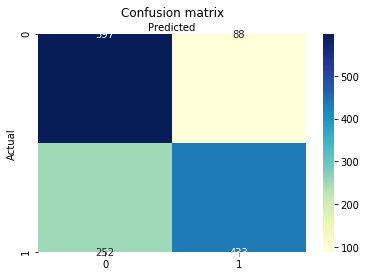

In [446]:
cnf_matrix = metrics.confusion_matrix(y_valid, lr_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')# create heatmap
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
# lift

Marketing models usually use lift as evaluation metric. <br/>

Lift is a measure of the effectiveness of a predictive model calculated as the ratio between the results obtained with and without the predictive model.<br/>

The greater the area between the lift curve and the baseline, the better the model.<br/>

In [451]:
# LR with hyperparameter tuning
lr = LogisticRegression()

param_grid = {'penalty' : ['l1', 'l2'], # l1 lasso l2 ridge
              'C' : np.logspace(-4, 0, 4, 10, 20),
              'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
              'max_iter' : [1000, 2500, 5000]
                }

grid = GridSearchCV(lr, param_grid, cv = 3, verbose=True, n_jobs=-1) # hyperparameter tuning by using cross-validation

grid.fit(x_train, y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.2min finished


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([6.25000000e-06, 3.39302202e-04, 1.84201575e-02, 1.00000000e+00]),
                         'max_iter': [1000, 2500, 5000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             verbose=True)

In [458]:
grid.best_estimator_ #LogisticRegression(C=6.25e-06, max_iter=1000)

LogisticRegression(C=6.25e-06, max_iter=1000)

In [459]:
lr1 = LogisticRegression(C=6.25e-06, max_iter=1000, random_state=1)
lr1.fit(x_train, y_train)
lr1_pred = lr1.predict(x_valid)
evaluate_model('LR', lr1, x_valid, y_valid)

LR -- Accuracy:0.735 / Precision:0.757 / Recall:0.692 / F1:0.723 / AUROC:0.735 / Latency:0ms


In [460]:
confusion_matrix(y_valid, lr1_pred)

array([[533, 152],
       [211, 474]], dtype=int64)

best LR:<br/>
LogisticRegression(random_state = 1)<br/>
LR -- Accuracy:0.752 / Precision:0.831 / Recall:0.632 / F1:0.718 / AUROC:0.752 / Latency:0ms
  
LogisticRegression(C=6.25e-06, max_iter=2500, solver='sag')<br/>
LR -- Accuracy:0.735 / Precision:0.757 / Recall:0.692 / F1:0.723 / AUROC:0.735 / Latency:0ms

### SVM

In [466]:
# SVM baseline model

#from sklearn import svm
#from sklearn.svm import SVC 

svm = SVC(random_state = 1)
svm_result = svm.fit(x_train, y_train)
svm_pred = svm_result.predict(x_valid)
evaluate_model('SVM', svm, x_valid, y_valid)


SVM -- Accuracy:0.748 / Precision:0.837 / Recall:0.616 / F1:0.71 / AUROC:0.748 / Latency:1ms


In [467]:
metrics.confusion_matrix(y_valid, svm_pred)


array([[603,  82],
       [263, 422]], dtype=int64)

In [464]:
# SVM with hyperparameter tuning
svm = SVC(random_state = 1)

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

grid = GridSearchCV(svm, param_grid, refit = True, verbose = 3) 
grid.fit(x_train, y_train) 
grid.best_estimator_  #SVC(C=0.1, gamma=0.1, random_state=1)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.488, total=   4.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.500, total=   3.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.4s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.500, total=   4.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.500, total=   3.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.500, total=   3.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.415, total=   3.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.553, total=   4.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.548, total=   4.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.739, total=   3.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  8.1min finished


SVC(C=1, gamma=0.0001, random_state=1)

In [465]:
svm1 = SVC(C=0.1, gamma=0.1, random_state=1)
svm1_result = svm1.fit(x_train, y_train)
svm1_pred = svm1_result.predict(x_valid)
evaluate_model('SVM', svm1, x_valid, y_valid)

SVM -- Accuracy:0.593 / Precision:0.56 / Recall:0.869 / F1:0.681 / AUROC:0.593 / Latency:1ms


The baseline SVM model has a better performance on metrics except recall.

best SVM:<br/>
SVC(random_state = 1)<br/>
SVM -- Accuracy:0.748 / Precision:0.837 / Recall:0.616 / F1:0.71 / AUROC:0.748 / Latency:1ms

### XGBoost

In [468]:
# XGBoost baseline model

# xgb = xgb.XGBClassifier(random_state = 1, use_label_encoder = False)
xgb = xgb.XGBClassifier(random_state = 1)
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_valid)
evaluate_model('XGB', xgb, x_valid, y_valid)

C:\Users\yangz\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:30:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB -- Accuracy:0.739 / Precision:0.772 / Recall:0.677 / F1:0.722 / AUROC:0.739 / Latency:0ms


In [469]:
# XGBoost with hyperparameter tuning
param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

grid = GridSearchCV(xgb, param_grid, cv=3, n_jobs= 4, verbose = 3) 
grid.fit(x_train, y_train)
grid.best_estimator_

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   10.9s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   43.0s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed:  3.1min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  5.1min
[Parallel(n_jobs=4)]: Done 1144 tasks      | elapsed:  7.7min
[Parallel(n_jobs=4)]: Done 1215 out of 1215 | elapsed:  8.3min finished
C:\Users\yangz\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:39:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [471]:
import xgboost as xgb
xgb1 = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=10, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgb1.fit(x_train, y_train)
xgb1_pred = xgb1.predict(x_valid)
evaluate_model('XGB', xgb1, x_valid, y_valid)

C:\Users\yangz\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:44:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB -- Accuracy:0.762 / Precision:0.846 / Recall:0.641 / F1:0.729 / AUROC:0.762 / Latency:0ms


best XGB:<br/>

XGBClassifier(random_state = 1)<br/>
XGB -- Accuracy:0.739 / Precision:0.772 / Recall:0.677 / F1:0.722 / AUROC:0.739 / Latency:0ms

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=10, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)<br/>
XGB -- Accuracy:0.762 / Precision:0.846 / Recall:0.641 / F1:0.729 / AUROC:0.762 / Latency:0ms

conclusion of models:<br/>

Among the above models, XGB with hyperparameter tuning has the overall best performance based on AUROC and precision. SVM with hyperparameter performs best based on recall.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=10, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)

### feature importance

Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.<br/>

Feature importance scores play an important role in a predictive modeling project, including providing insight into the data, insight into the model, and the basis for dimensionality reduction and feature selection that can improve the efficiency and effectiveness of a predictive model on the problem.

In [ ]:
# Random Forest feature importance

In [472]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 6, random_state = 1)
rf.fit(x_train, y_train)

feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = cols_x,
                                   columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
euribor3m,0.188459
nr.employed,0.167784
emp.var.rate,0.145649
cons.conf.idx,0.091322
cons.price.idx,0.065501


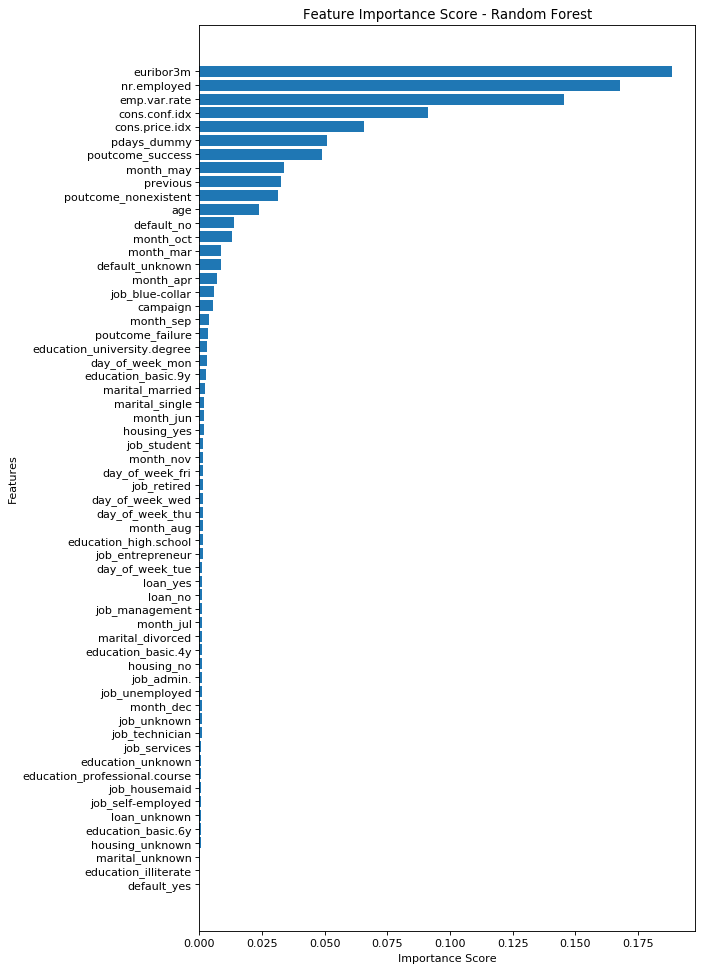

In [473]:
num = np.min([65, len(cols_x)])# top 65 important features
ylocs = np.arange(num)

values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]# get the feature importance for top num and sort in reverse order
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show() 

In [ ]:
# Gradient Boosting feature importance

In [474]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=1)
gbc.fit(x_train, y_train)

feature_importances = pd.DataFrame(gbc.feature_importances_,
                                   index = cols_x,
                                   columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances

,importance
nr.employed,0.442711
cons.conf.idx,0.108390
euribor3m,0.102834
age,0.062681
campaign,0.033242
pdays_dummy,0.027230
emp.var.rate,0.027072
cons.price.idx,0.022955
marital_single,0.009183
poutcome_failure,0.008534


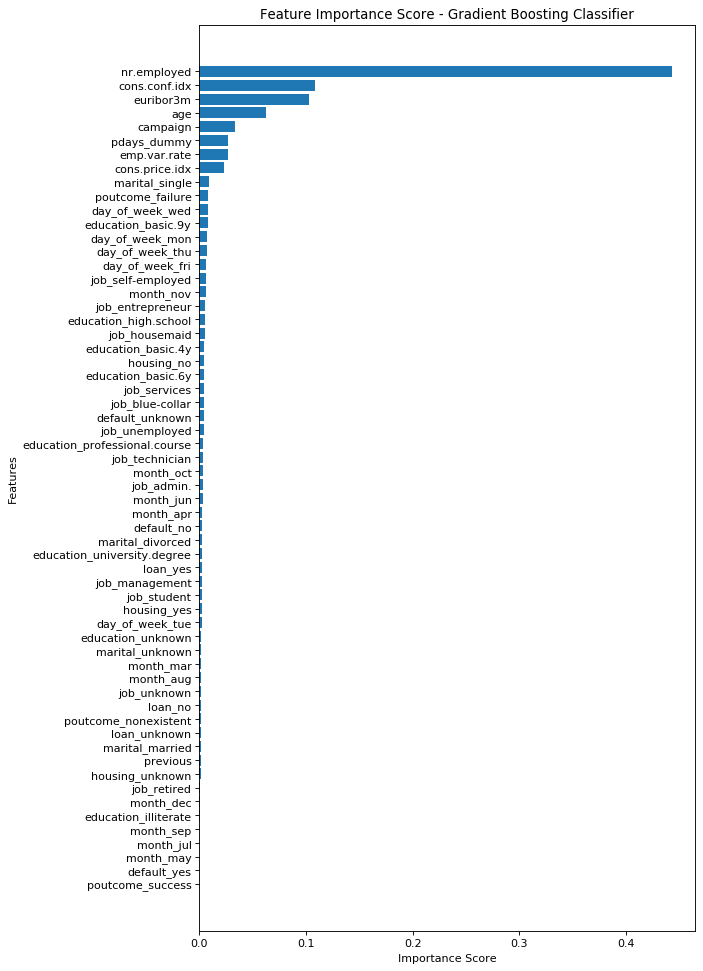

In [475]:
num = np.min([65, len(cols_x)])
ylocs = np.arange(num)

values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Gradient Boosting Classifier')
plt.yticks(ylocs, feature_labels)
plt.show()

From both methods, we find that 'cons.conf.idx', 'age', 'euribor3m','pdays_dummy' have high feature importance.<br/>

Exclude features with zero importance in both methods(e.g.'default_yes')

# Improved Models

In [ ]:
# improving by deleting unnecessary variables

In [391]:
#df = df.drop(['marital_unknown','education_illiterate','default_yes'], axis = 1)

# End